In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

Using TensorFlow backend.
/Users/samharrison/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('train data dim:', x_train.shape)
# Print x_test and y_test dimensions
print('test data dim:', x_test.shape)
print('test label dim:', y_test.shape)
# Question: How many train/test samples does it have?

# Print the minimum and maximum of x_train and x_test(use numpy min and max functions)
print('max of train data:',np.max(x_train))
print('min of train data:',np.min(x_train))
print('max of test data:',np.max(x_test))
print('min of test data:',np.min(x_test))

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
max of train data: 255
min of train data: 0
max of test data: 255
min of test data: 0


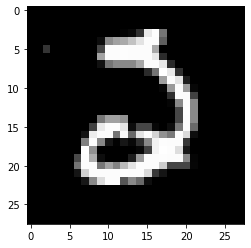

label: 2


In [4]:
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label
print('label:', y_train[rand_num])

In [5]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

In [6]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

In [9]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [10]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 3,
                    verbose = 1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 10s 198us/step - loss: 2.1891 - acc: 0.2777 - val_loss: 1.6131 - val_acc: 0.5854
Epoch 2/3
48000/48000 [==============================] - 9s 195us/step - loss: 0.8192 - acc: 0.7642 - val_loss: 0.4951 - val_acc: 0.8579
Epoch 3/3
48000/48000 [==============================] - 9s 193us/step - loss: 0.4456 - acc: 0.8717 - val_loss: 0.3710 - val_acc: 0.8934


In [12]:
te_score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss:', te_score[0])
print('Test accuracy:', te_score[1])


Test Loss: 1.7974373320579529
Test accuracy: 0.8868


In [13]:
# save model here:
model.save('mlp.h5')
# Delete model to make sure you reload it correctly:
del model

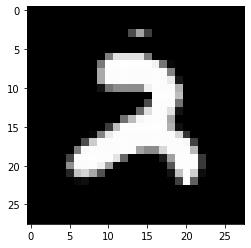

True label: 2
Predicted label: 2


In [19]:
# reload the model here:
model = load_model('mlp.h5')
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
img = x_train[rand_num]
img = np.expand_dims(img, axis = 0)
predicted_label =model.predict(img, 1)
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray' )
plt.show()
# print its label
true_label = np.argmax(y_train[rand_num])
predicted_label = np.argmax(predicted_label)
print('True label:', true_label)
print('Predicted label:', predicted_label)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 12s 247us/step - loss: 0.3725 - acc: 0.8941 - val_loss: 0.3296 - val_acc: 0.9060
Epoch 2/100
48000/48000 [==============================] - 12s 246us/step - loss: 0.3346 - acc: 0.9042 - val_loss: 0.2980 - val_acc: 0.9153
Epoch 3/100
48000/48000 [==============================] - 11s 231us/step - loss: 0.3042 - acc: 0.9124 - val_loss: 0.2766 - val_acc: 0.9214
Epoch 4/100
48000/48000 [==============================] - 11s 229us/step - loss: 0.2757 - acc: 0.9218 - val_loss: 0.2565 - val_acc: 0.9262
Epoch 5/100
48000/48000 [==============================] - 13s 261us/step - loss: 0.2498 - acc: 0.9290 - val_loss: 0.2331 - val_acc: 0.9340
Epoch 6/100
48000/48000 [==============================] - 12s 242us/step - loss: 0.2264 - acc: 0.9358 - val_loss: 0.2083 - val_acc: 0.9436
Epoch 7/100
48000/48000 [==============================] - 11s 238us/step - loss: 0.2051 - acc: 0.9416 - val_l

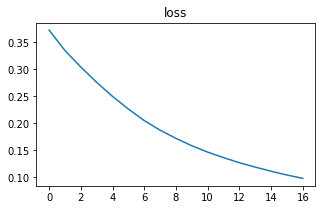

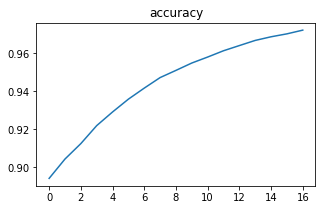

In [20]:
# We will use two callbacks here: EarlyStopping, CSVLogger (you may add other callbacks to this list)
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, min_delta=0.01, patience = 2, mode= 'min' ),
            keras.callbacks.CSVLogger('log.csv')]
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 100,
                    verbose = 1,
                    validation_split = 0.2,
                    callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [16]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,1)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,1)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,1)))
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 2,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 14.5577 - acc: 0.0968 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 2/10
 - 12s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 3/10
 - 13s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 4/10
 - 12s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 5/10
 - 12s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 6/10
 - 12s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 7/10
 - 12s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 8/10
 - 13s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 9/10
 - 11s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 10/10
 - 11s - loss: 14.5487 - acc: 0.0974 - val_loss: 14.5353 - val_acc: 0.0982


In [25]:
from keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir='./Graph')
model.fit(x_train, y_train, verbose = 1, callbacks=[tensor_board], epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0786 - acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0737 - acc: 0.9796
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0691 - acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0651 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0613 - acc: 0.9834
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0582 - acc: 0.9841
Epoch 7/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0548 - acc: 0.9850
Epoch 8/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0519 - acc: 0.9860
Epoch 9/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.0490 - acc: 0.9870
Epoch 10/10
60000/60000 [==============================] - 14s 226us/step - loss: 

In [27]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes = True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.